In [57]:
#Implement a basic k means clustering algorithm as a set of functions*

import numpy as np
import pandas as pd 
import random as rd
import matplotlib.pyplot as plt
from math import sqrt

In [58]:
# Considering Bank Dataset to find the cluster of Applicants based on Loan amount  
path = '/Users/Venkat/Downloads'
data=pd.read_csv(f'{path}/bankdata.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [59]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


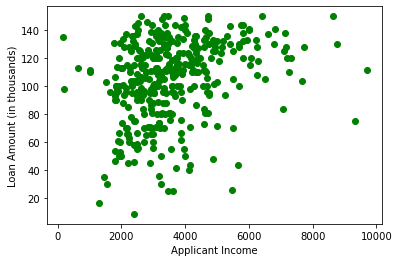

In [60]:
# a simple visualization of Data

X = data[["ApplicantIncome", "LoanAmount"]]
plt.scatter(X["ApplicantIncome"], X["LoanAmount"], c="green")
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount (in thousands)")
plt.show()

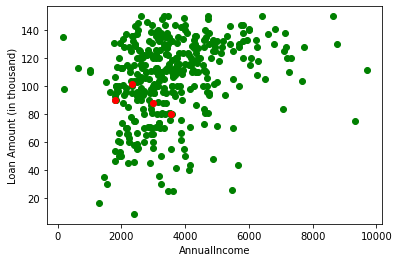

In [61]:
# Visualization of clusters 
# selecting random observation as a centriod 

K=4
Centroids = (X.sample(n=K))
plt.scatter(X["ApplicantIncome"], X["LoanAmount"], c="green")
plt.scatter(Centroids["ApplicantIncome"], Centroids["LoanAmount"], c="red")
plt.xlabel("AnnualIncome")
plt.ylabel("Loan Amount (in thousand)")
plt.show()

In [62]:
Centroids

,ApplicantIncome,LoanAmount
308,3547,80.0
109,2333,102.0
156,1809,90.0
375,2987,88.0


In [63]:
# K Means Code that runs all the way from reading data to printing out metrics 
# Assign all the points to the closest cluster centroid
# Recompute centroids of newly formed clusters
# Repeat above steps

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1, row_c in Centroids.iterrows():
        ED=[]
        for index2, row_d in XD.iterrows():
            d1 = (row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2 = (row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d = d1+d2
            d = d ** 0.5

            ED.append(d)
        X[i] = ED
        i = i+1
    
    C = []
    for index, row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos = i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount", "ApplicantIncome"]]
    if j == 0:
        diff = 1
        j = j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

/var/folders/6v/wb620prs6cvgfl25kb9tmwhw0000gn/T/ipykernel_3866/3108722739.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = ED
/var/folders/6v/wb620prs6cvgfl25kb9tmwhw0000gn/T/ipykernel_3866/3108722739.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C


743.597201544065
492.2252933507153
498.3101757905961
396.4411628679501
465.9239483531461
452.4064380152259
437.3266219892107
282.30940494325193
259.1030963878948
152.67763997179662
138.57938875285322
185.7519667602552
150.7138604502108
258.12444617431265
80.88049805480205
98.73028835580249
62.66322697484502
104.27646153737801
74.80528844791053
114.6034083299616
85.91568265869635
12.76957382171075
0.0


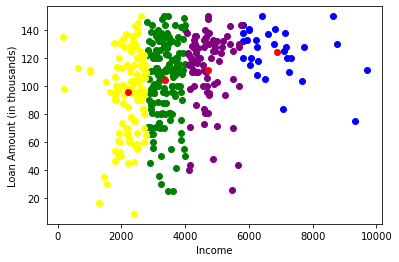

In [64]:
color=['blue','green','yellow', 'purple']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (in thousands)')
plt.show()
